In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.3.0


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
!head {fn}
dataset_path=fn

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
column_names=['sepal length', 'sepal width','petal length','petal width','type']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.head()

,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.tail()

,sepal length,sepal width,petal length,petal width,type
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
dataset.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
type            0
dtype: int64

In [ ]:
for i in range(150):
  if (dataset['type'][i]=='Iris-setosa'):
    dataset['type'][i]=1
  if (dataset['type'][i]=='Iris-versicolor'):
    dataset['type'][i]=2
  if (dataset['type'][i]=='Iris-virginica'):
    dataset['type'][i]=3
    #dont run



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
dataset.head()

,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
dataset.tail()

,sepal length,sepal width,petal length,petal width,type
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [ ]:
train_type=train_dataset.pop('type')
test_type=test_dataset.pop('type')


In [ ]:
train_type

114    3
62     2
33     1
107    3
7      1
      ..
57     2
131    3
65     2
32     1
138    3
Name: type, Length: 120, dtype: object

In [ ]:
train_dataset

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
...,...,...,...,...
57,4.9,2.4,3.3,1.0
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4
32,5.2,4.1,1.5,0.1


In [ ]:
# Use seaborn for pairplot
!pip install seaborn

In [ ]:
train_stats = train_dataset.describe()
train_stats

,sepal length,sepal width,petal length,petal width
count,120.000000,120.000000,120.000000,120.000000
mean,5.823333,3.050833,3.752500,1.200000
std,0.828660,0.438292,1.753075,0.755818
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.750000,3.000000,4.400000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
img=train_dataset
print(img.shape)

def build_model():
  model = keras.Sequential([
   keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_dataset.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.relu)
  ])

  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model

(120, 4)


In [ ]:
model = build_model()
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_63 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [ ]:
train_dataset1=np.array(train_dataset)


In [ ]:
train_type1=np.array(train_type)

In [ ]:
train_labels1=np.array(train_labels)

In [ ]:
train_dataset.shape

(120, 4)

In [ ]:
train_type.shape

(120,)

In [ ]:
train_type1=train_type1.astype(int)

In [ ]:
train_type1

array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 1, 2, 2, 2, 3, 1, 3, 1,
       1, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 1, 3, 2, 2, 2,
       2, 3, 1, 1, 3, 2, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 3, 2, 3, 2, 1, 3])

In [ ]:
train_dataset1

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [ ]:
history=model.fit(train_dataset1, train_type1, epochs=500,
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
495,NaN,0.0,NaN,0.0,495
496,NaN,0.0,NaN,0.0,496
497,NaN,0.0,NaN,0.0,497
498,NaN,0.0,NaN,0.0,498
499,NaN,0.0,NaN,0.0,499


In [ ]:
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,NaN,0.0,NaN,0.0,0
1,NaN,0.0,NaN,0.0,1
2,NaN,0.0,NaN,0.0,2
3,NaN,0.0,NaN,0.0,3
4,NaN,0.0,NaN,0.0,4


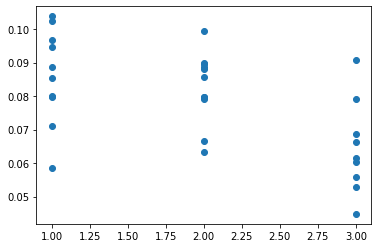

In [ ]:
test_predictions=model.predict(test_dataset).flatten()
plt.scatter(test_type,test_predictions)

In [ ]:
model.evaluate(test_dataset,test_type)

ValueError: ignored